In [7]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('../FINAL PROJECT/03_data_total.csv')
data.head()

,Unnamed: 0,precio_m2,superficie_total,categoria,dormitorios,baños,cocheras,colonia,alcaldia,lat,lng
0,0,60144.927536,138.0,departamento,2.0,3.0,2.0,POLANCO REFORMA (POLANCO),MIGUEL HIDALGO,19.437734,-99.192631
1,1,104651.162791,172.0,departamento,2.0,2.0,2.0,POLANCO REFORMA (POLANCO),MIGUEL HIDALGO,19.432741,-99.198231
2,2,85919.540230,174.0,departamento,2.0,2.0,2.0,POLANCO REFORMA (POLANCO),MIGUEL HIDALGO,19.436965,-99.197446
3,3,5092.622951,183.0,departamento,3.0,3.0,2.0,POLANCO REFORMA (POLANCO),MIGUEL HIDALGO,19.435298,-99.200454
4,4,93125.000000,160.0,departamento,2.0,2.0,2.0,POLANCO REFORMA (POLANCO),MIGUEL HIDALGO,19.434020,-99.195601


In [9]:
data.count()

Unnamed: 0          9300
precio_m2           9180
superficie_total    9298
categoria           9300
dormitorios         9267
baños               9264
cocheras            9184
colonia             9300
alcaldia            9300
lat                 9300
lng                 9300
dtype: int64

In [10]:
# Drop all rows with missing information
data = data.dropna(how='any')

In [11]:
data.count()

Unnamed: 0          9058
precio_m2           9058
superficie_total    9058
categoria           9058
dormitorios         9058
baños               9058
cocheras            9058
colonia             9058
alcaldia            9058
lat                 9058
lng                 9058
dtype: int64

In [14]:
data.dtypes

Unnamed: 0            int64
precio_m2           float64
superficie_total    float64
categoria            object
dormitorios         float64
baños               float64
cocheras            float64
colonia              object
alcaldia             object
lat                 float64
lng                 float64
dtype: object

In [15]:
data.describe()

,Unnamed: 0,precio_m2,superficie_total,dormitorios,baños,cocheras,lat,lng
count,9058.000000,9.058000e+03,9058.000000,9058.000000,9058.000000,9058.000000,9058.000000,9058.000000
mean,4645.476374,5.093329e+04,261.141607,2.874917,2.570291,2.467653,19.387010,-99.189194
std,2680.694265,3.655735e+05,344.474417,1.112690,1.193571,5.358939,0.050181,0.049376
min,0.000000,1.754386e-02,1.000000,0.000000,0.000000,0.000000,19.200199,-99.330706
25%,2319.250000,2.929392e+04,90.000000,2.000000,2.000000,1.000000,19.356860,-99.221199
50%,4651.500000,4.262229e+04,150.000000,3.000000,2.000000,2.000000,19.386070,-99.186050
75%,6962.750000,5.608847e+04,299.000000,3.000000,3.000000,3.000000,19.424938,-99.157175
max,9299.000000,3.000000e+07,7000.000000,18.000000,12.000000,322.000000,19.583330,-98.995812


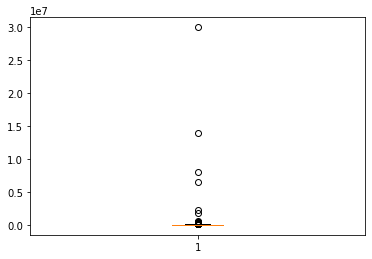

In [17]:
precio = data['precio_m2']
fig1, ax1 = plt.subplots()
ax1.boxplot(precio)
plt.show()

In [23]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = precio.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of precio is: {lowerq}")
print(f"The upper quartile of precio is: {upperq}")
print(f"The interquartile range of precio is: {iqr}")
print(f"The the median of precio is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of precio is: 29293.915719696968
The upper quartile of precio is: 56088.471713471714
The interquartile range of precio is: 26794.555993774746
The the median of precio is: 42622.28712213487 
Values below -10897.91827096515 could be outliers.
Values above 96280.30570413383 could be outliers.


In [29]:
#Clean data removing outliers
data2=data.loc[(data['precio_m2']>=-10897.91827096515 ) & (data['precio_m2']<= 96280.30570413383),:].sort_values('precio_m2', ascending= False)
data2.count()


Unnamed: 0          8782
precio_m2           8782
superficie_total    8782
categoria           8782
dormitorios         8782
baños               8782
cocheras            8782
colonia             8782
alcaldia            8782
lat                 8782
lng                 8782
dtype: int64

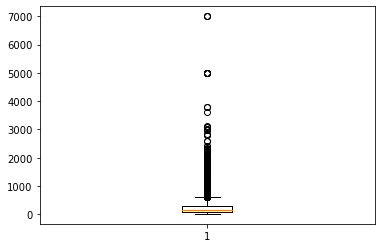

In [30]:
superficie = data2['superficie_total']

fig1, ax1 = plt.subplots()
ax1.boxplot(superficie)
plt.show()

In [31]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = superficie.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of superficie is: {lowerq}")
print(f"The upper quartile of superficie is: {upperq}")
print(f"The interquartile range of superficie is: {iqr}")
print(f"The the median of superficie is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of superficie is: 89.0
The upper quartile of superficie is: 300.0
The interquartile range of superficie is: 211.0
The the median of superficie is: 150.0 
Values below -227.5 could be outliers.
Values above 616.5 could be outliers.


In [33]:
#Clean data removing outliers
data3=data2.loc[(data2['superficie_total']>=-227.5 ) & (data2['superficie_total']<= 616.5),:].sort_values('superficie_total', ascending= False)
data3.count()


Unnamed: 0          7963
precio_m2           7963
superficie_total    7963
categoria           7963
dormitorios         7963
baños               7963
cocheras            7963
colonia             7963
alcaldia            7963
lat                 7963
lng                 7963
dtype: int64

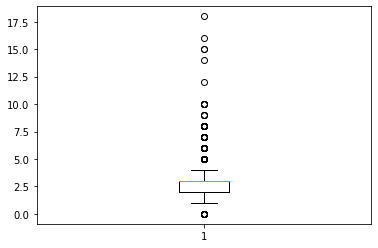

In [34]:
dormitorios = data3['dormitorios']

fig1, ax1 = plt.subplots()
ax1.boxplot(dormitorios)
plt.show()

In [35]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = dormitorios.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of dormitorios is: {lowerq}")
print(f"The upper quartile of dormitorios is: {upperq}")
print(f"The interquartile range of dormitorios is: {iqr}")
print(f"The the median of dormitorios is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of dormitorios is: 2.0
The upper quartile of dormitorios is: 3.0
The interquartile range of dormitorios is: 1.0
The the median of dormitorios is: 3.0 
Values below 0.5 could be outliers.
Values above 4.5 could be outliers.


In [36]:
#Clean data removing outliers
data4=data3.loc[(data3['dormitorios']>=0.5) & (data3['dormitorios']<= 4.5),:].sort_values('dormitorios', ascending= False)
data4.count()

Unnamed: 0          7627
precio_m2           7627
superficie_total    7627
categoria           7627
dormitorios         7627
baños               7627
cocheras            7627
colonia             7627
alcaldia            7627
lat                 7627
lng                 7627
dtype: int64

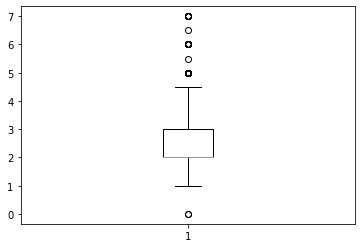

In [37]:
baños = data4['baños']
fig1, ax1 = plt.subplots()
ax1.boxplot(baños)
plt.show()

In [38]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = baños.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of dormitorios is: {lowerq}")
print(f"The upper quartile of dormitorios is: {upperq}")
print(f"The interquartile range of dormitorios is: {iqr}")
print(f"The the median of dormitorios is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of dormitorios is: 2.0
The upper quartile of dormitorios is: 3.0
The interquartile range of dormitorios is: 1.0
The the median of dormitorios is: 2.0 
Values below 0.5 could be outliers.
Values above 4.5 could be outliers.


In [39]:
#Clean data removing outliers
data5=data4.loc[(data4['baños']>=0.5) & (data4['baños']<= 4.5),:].sort_values('baños', ascending= False)
data5.count()

Unnamed: 0          7495
precio_m2           7495
superficie_total    7495
categoria           7495
dormitorios         7495
baños               7495
cocheras            7495
colonia             7495
alcaldia            7495
lat                 7495
lng                 7495
dtype: int64

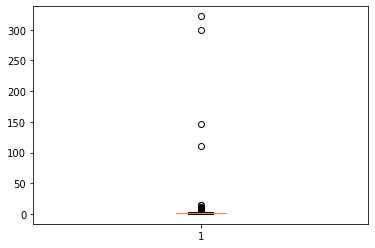

In [40]:
cocheras = data5['cocheras']

fig1, ax1 = plt.subplots()
ax1.boxplot(cocheras)
plt.show()

In [41]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = cocheras.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of dormitorios is: {lowerq}")
print(f"The upper quartile of dormitorios is: {upperq}")
print(f"The interquartile range of dormitorios is: {iqr}")
print(f"The the median of dormitorios is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of dormitorios is: 1.0
The upper quartile of dormitorios is: 2.0
The interquartile range of dormitorios is: 1.0
The the median of dormitorios is: 2.0 
Values below -0.5 could be outliers.
Values above 3.5 could be outliers.


In [42]:
#Clean data removing outliers
data6=data5.loc[(data5['cocheras']>=-0.5) & (data5['cocheras']<= 3.5),:].sort_values('cocheras', ascending= False)
data6.count()

Unnamed: 0          6813
precio_m2           6813
superficie_total    6813
categoria           6813
dormitorios         6813
baños               6813
cocheras            6813
colonia             6813
alcaldia            6813
lat                 6813
lng                 6813
dtype: int64

In [43]:
data6.describe()

,Unnamed: 0,precio_m2,superficie_total,dormitorios,baños,cocheras,lat,lng
count,6813.000000,6813.000000,6813.000000,6813.000000,6813.000000,6813.000000,6813.000000,6813.000000
mean,4942.826655,43468.255094,150.910916,2.550418,2.177176,1.656392,19.391536,-99.183203
std,2621.558066,19603.577197,100.124761,0.730986,0.758350,0.792157,0.048897,0.048290
min,0.000000,0.017544,12.160000,1.000000,1.000000,0.000000,19.200199,-99.327320
25%,2963.000000,32000.000000,80.000000,2.000000,2.000000,1.000000,19.362330,-99.208290
50%,5080.000000,43431.946746,119.000000,3.000000,2.000000,2.000000,19.388370,-99.176980
75%,7190.000000,55620.472073,187.000000,3.000000,3.000000,2.000000,19.430751,-99.153248
max,9299.000000,96153.846154,614.000000,4.000000,4.500000,3.000000,19.583330,-98.996040


In [44]:
pd.DataFrame(data6).to_csv('04_data_total_clean.csv')